In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
def avg_call_price(Ct, T, t):
    return 1/len(Ct[:, -1]) * np.exp(-r*(T-t)) * np.sum(Ct[:, -1])

n = 10**4
time_points = 100
end = 10
T = np.linspace(0, end, time_points)
r = -0.0027
σ = 0.21

Ct = np.zeros((n, time_points))
for i in np.arange(n):
    S = np.zeros(time_points)
    S[0] = 715
    for j in np.arange(1, time_points):
        # formule uit einde lecture 4
        S[j] = S[j-1] * np.exp((r - 0.5*σ**2) * (T[j] - T[j-1]) + np.random.normal() * σ * (T[j] - T[j-1])**0.5)
    Ct[i, :] = S

# nsamples x ntime points array
# np.savetxt("MC_stock_prices.txt", Ct, delimiter=",")

In [3]:
# take log to force positive prices
Ct = np.log(Ct)

# calculate mean, std at each time point
errors = np.std(Ct, axis=0)
means = np.mean(Ct, axis=0)

interval = st.norm.interval(0.95, loc=np.mean(Ct, axis=0), scale=np.std(Ct, axis=0))

In [4]:
print(f"95% CI stock price after 10 years: {np.exp((interval[0][-1])), np.exp((interval[1][-1]))}")

95% CI stock price after 10 years: (153.0124990124878, 2061.352264875427)


In [5]:
# om de data te creëeren

# n = 10**4
# m = 10**2
# Δt = T[-1]/m

# It = np.zeros((n, m))
# for i in range(n):
#     S = [715]
#     for j, t in enumerate(np.arange(Δt, end, Δt)):
        ## formule lecture 4
#         S += [S[-1] * np.exp((r - 0.5*σ**2) * Δt + np.random.normal() * σ * Δt**0.5)]
        ## trapezoid rule
#         It[i, j] = 1/T[j+1] * np.sum([(S[k+1] + S[k])/2 * Δt for k in range(len(S)-1)])

# # save as n x m array
# np.savetxt("Q5_prices.txt", It, delimiter=",")

In [6]:
It = np.loadtxt("Q5_prices.txt", delimiter=",")[:, :-1]

interval = st.norm.interval(0.95, loc=np.mean(It, axis=0), scale=np.std(It, axis=0))

print(f"95% CI stock price after 10 years: {interval[0][-1], interval[1][-1]}")


95% CI stock price after 10 years: (149.2021789703091, 1244.1761960880235)


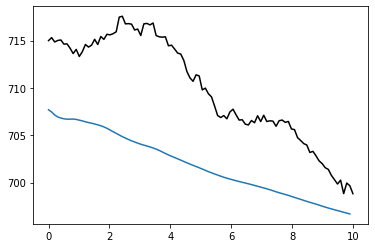

In [7]:
plt.plot(T, np.mean(np.exp(Ct), axis=0), 'k-')
plt.plot(T[:-1], np.mean(It, axis=0))
plt.show()

In [18]:
# to be continued

cov_matrix = np.cov([np.mean(It, axis=0), np.mean(Ct[:, :-1], axis=0)])

print(cov_matrix)

β = -cov_matrix[0, 1] / cov_matrix[1, 1]

# It = 

# It_control = np.zeros(len(It))
# for i in np.arange(n):
#     pass

[[1.08807967e+01 2.30968781e-01]
 [2.30968781e-01 4.93399249e-03]]
